In [37]:
import ecos
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint

In [625]:
class toy_problem:
    def __init__(self, x0, controller, tspan): 
        self.x0 = [x0]
        self.controller = controller 
        self.t_span = tspan
        self.name = "Toy Problem"
        self.measure = lambda x: x
        
    def dynamics(self, x, t): 
        xdot = x + (x + 1)*self.controller(self.measure(x))
        return xdot 
    
    def integrate(self):
        self.x_traj = odeint(self.dynamics, self.x0, self.t_span)
        self.inputs = []
        self.x_traj_measured = []
        self.xdot_traj = []
        for x in self.x_traj:
            self.inputs.append(self.controller(self.measure(x)))
            self.x_traj_measured.append(self.measure(x))
            self.xdot_traj.append(self.dynamics(x, 1))
        
    def plot(self): 
        f, ax = plt.subplots(3,1)
        
        ax[0].plot(self.t_span, self.x_traj)
        ax[0].plot(self.t_span, self.x_traj_measured)
        ax[0].set_title("Trajectories for " + self.name)
        ax[0].legend(["True Trajectory", "Measured Trajectory"])
        ax[0].set_xlabel('time')
        ax[0].set_ylabel('x')
        
        ax[1].plot(self.t_span, self.inputs)
        ax[1].set_xlabel('time')
        ax[1].set_ylabel('u')
        
        ax[2].plot(self.t_span, self.xdot_traj)
        
        plt.show()
        
        
        

In [646]:
# Define ECOS controller

def measurement_safe_controller(x): 
    x = x[0]
    epsilon = 0.001
    alpha = 1
    udes = 1
    dims = {
        'l': 0,
        'q': [3,2],
        'e': 0
    }
    c = np.array([1.0, 0.0, -udes])
    G = [[-1/np.sqrt(2), 0, 0 ], [-1/np.sqrt(2), 0, 0 ], [0, 0, -1], [0, 0, (x + 1)/epsilon], [0, 0, -1]] 
    G = sp.sparse.csc_matrix(G)
    h = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0, -(1 + alpha)*x/epsilon + alpha/epsilon - ( 1 + alpha), 0])
    output = ecos.solve(c,G,h,dims, verbose=False)
    return output['x'][2]

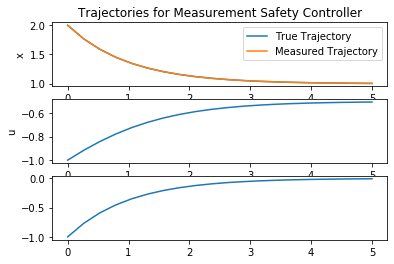

In [649]:
test2 = toy_problem(2, measurement_safe_controller, np.linspace(0,5,20))
test2.integrate()
test2.name = "Measurement Safety Controller"
test2.plot()

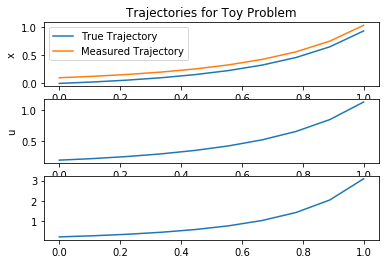

In [648]:
test1 = toy_problem(0, lambda x: x+ 0.1, np.linspace(0,1,10))
test1.measure = lambda x: x+0.1
test1.integrate()
test1.plot()